In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('data/dc_bikes.csv', parse_dates=['datetime'], dayfirst = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       17379 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 1.6 MB


In [11]:
df.set_index('datetime', inplace = True)

### 1. Extract features into their own columns

In [12]:
df['year'] = df.index.year

In [13]:
df['month'] = df.index.month

In [14]:
df['day'] = df.index.day

In [15]:
df['hour'] = df.index.hour

In [16]:
df['minute'] = df.index.minute

In [17]:
df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute
datetime,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,0,0


### 2. Plot small sections of the count data over time (1 day, 1 week, etc.)

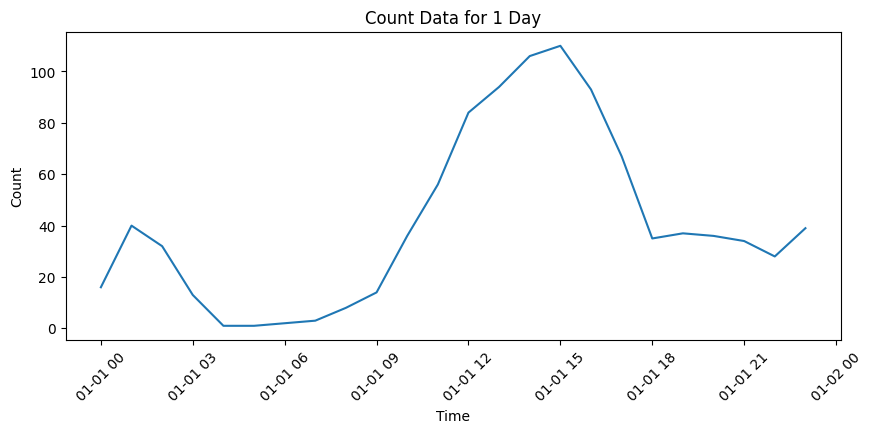

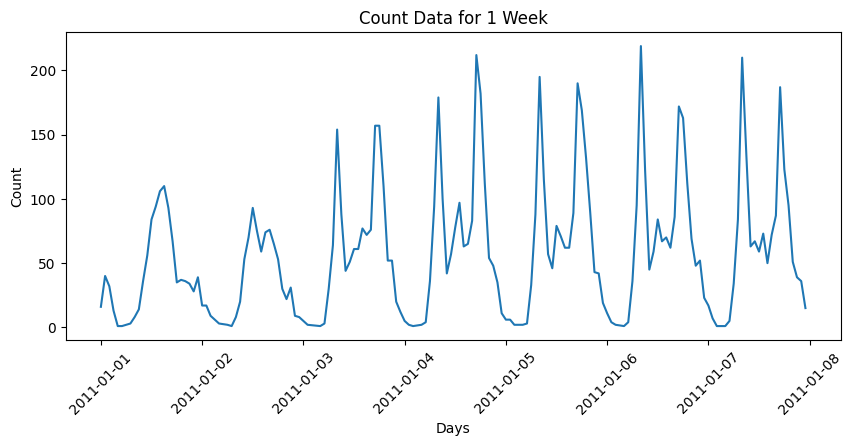

In [18]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

df.set_index('datetime', inplace=True)

# Plotting a section for 1 day
one_day_section = df['count'].loc['2011-01-01']
plt.figure(figsize=(10,4))
plt.plot(one_day_section)
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Count Data for 1 Day')
plt.show()

# Plotting a section for 1 week
one_week_section = df['count'].loc['2011-01-01':'2011-01-07']
plt.figure(figsize=(10,4))
plt.plot(one_week_section)
plt.xlabel('Days')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Count Data for 1 Week')
plt.show()


### 3. Create a part_of_day column for the bike data

In [19]:
df['part_of_day'] = pd.cut(df['hour'], bins=[-np.inf, 6, 12, 18,  np.inf], labels=['night', 'morning', 'afternoon', 'evening'])

In [20]:
df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,part_of_day
datetime,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,0,0,night


### 4. Saving

#df.to_csv('dc_bikes_with_features')

### 5. Group data by one of the newly created time features and observe grouped means


In [21]:
month_means = df.groupby('month')['count'].mean()
month_means

month
1      87.055983
2     113.305742
3     140.877800
4     186.999304
5     227.450941
6     251.742361
7     231.547715
8     222.332203
9     232.175365
10    225.635424
11    193.584551
12    143.405260
Name: count, dtype: float64

In [22]:
day_means = df.groupby('hour')['count'].mean()
day_means

hour
0      54.721763
1      33.743094
2      23.051748
3      12.229555
4       7.236729
5      20.337517
6      76.237241
7     208.914718
8     355.598349
9     217.140303
10    171.867950
11    206.818432
12    251.504121
13    252.094650
14    238.799726
15    249.893004
16    309.489041
17    459.472603
18    423.195055
19    310.722527
20    225.796703
21    171.752747
22    133.013736
23     89.640110
Name: count, dtype: float64

In [23]:
year_means = df.groupby('year')['count'].mean()
year_means

year
2011    158.209485
2012    218.706091
Name: count, dtype: float64

### Bonus

In [24]:
df.reset_index(inplace = True)

In [25]:
jan_2011_subset = df[(df['datetime'].dt.year == 2011) & (df['datetime'].dt.month == 1)]

In [26]:
jan_2011_subset['rolling_avg'] = jan_2011_subset['count'].rolling(window=24).mean()

C:\Users\alina\AppData\Local\Temp\ipykernel_16228\1544673951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_2011_subset['rolling_avg'] = jan_2011_subset['count'].rolling(window=24).mean()


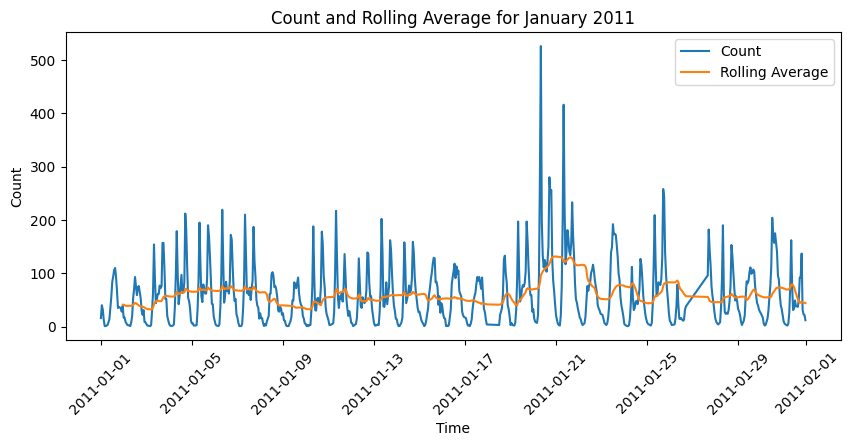

In [27]:
plt.figure(figsize=(10,4))
plt.plot(jan_2011_subset['datetime'], jan_2011_subset['count'], label='Count')
plt.plot(jan_2011_subset['datetime'], jan_2011_subset['rolling_avg'], label='Rolling Average')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count and Rolling Average for January 2011')
plt.legend()
plt.xticks(rotation=45)
plt.show()